# 1. Business Understanding

## 1.1 Introduction

Microsoft movie project seeks to ssek out relevant data which will be used by Microsoft in building a movie studio. The project focuses on Box Office Mojo, movie budgets and other movie information that has been used by other movie production companies.
After understanding the data, data will be cleaned to:removing any duplicates, Checking any missing data,Removing any irrelevant data. 
Thereafter Visualizations to present the data will be made to ensure it is easy to understand to the leader of microsoft.

## 1.2 Problem Statement

Microsoft wants to get into the movie industry. However they don't know much about the industry. They therefore want a data scientist to evaluate the movie industry, to identify which movies are actually doing well at the box office hence providing them with actionable insights that the company, Microsoft, can use to determine the films they will major on.

## 1.3 Main Objective

This project aims to help Microsoft's new movie studio make informed decisions about the types of films to create. By analyzing data from the film industry, insights and trends that will assist in identifying successful strategies for the studio can be uncovered.

## 1.4 Specific Objectives

a). Identify the most successful movie genres that microsoft head will use to make a prompt decision on which type of movies to put more focus on.

b). To visualize movie budgets (especially using the tn movie budgets file)

c). Understanding how different branches of the entire movie field affect the company reputation and sequentials for thaat matter. E.g., rating, genre, runtime.

## 1.5 Notebook Structure

Introduction

Problem Statement

Main Objective

Specific Ojectives

Importing Libraries

Data Understanding

Data Cleaning

Data Visualizations

Conclusions

Recommendations

References

# 2. Importing Libraries

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
import warnings

# 3. Data Understanding

In [2]:
warnings.filterwarnings("ignore")

## 3.1 Box office mojo

In [3]:
# Loading the data
bom_data = pd.read_csv("Data/bom.movie_gross.csv")

In [4]:
bom_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
# viewing the columns
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#To see the first rows in order to get a visual of how the data looks like
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
#To see the last rows in order to get a visual of how the data looks like
bom_data.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [8]:
# To get a glimpse of the data measures
bom_data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## 3.2 tn.movie_budgets.csv

In [9]:
# Loading the data
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")

In [10]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
# viewing the columns
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
#To see the first rows in order to get a visual of how the data looks like
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#To see the last rows in order to get a visual of how the data looks like
tn_movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [14]:
# To get a glimpse of the data measures
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


## 3.3 rt.movie.info.tsv

In [15]:
# Loading the data
rt_movie_info = pd.read_csv("Data/rt.movie_info.tsv", delimiter = "\t")

In [16]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [17]:
# viewing the columns
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [18]:
#To see the first rows in order to get a visual of how the data looks like
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [19]:
#To see the last rows in order to get a visual of how the data looks like
rt_movie_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [20]:
# To get a glimpse of the data measures
rt_movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


# 4. Data Cleaning

## 4.1 bom.movies_gross.csv

### 4.1.1 Checking any missing data

In [21]:
print(bom_data.isna())
print(bom_data.isna().sum())
#True indicates NaN(Not a number)

      title  studio  domestic_gross  foreign_gross   year
0     False   False           False          False  False
1     False   False           False          False  False
2     False   False           False          False  False
3     False   False           False          False  False
4     False   False           False          False  False
...     ...     ...             ...            ...    ...
3382  False   False           False           True  False
3383  False   False           False           True  False
3384  False   False           False           True  False
3385  False   False           False           True  False
3386  False   False           False           True  False

[3387 rows x 5 columns]
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


There are missing values in studio, foreign gross and domestic gross columns. To solve that, we replace the Null for Unknown the NaN value with the median

array([[<Axes: title={'center': 'domestic_gross'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

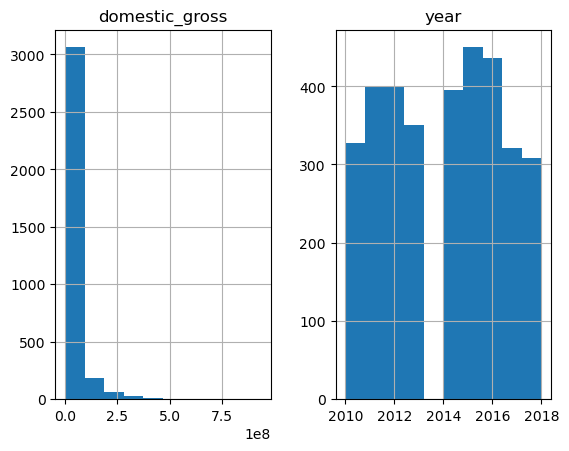

In [22]:
bom_data.hist()

In [23]:
bom_data["studio"] = bom_data.studio.fillna("unknown")

Now we replace NaN with the median of the data

In [24]:
# Remove commas from "domestic_gross" column
bom_data["domestic_gross"] = bom_data.domestic_gross.fillna(0)

We will do the same for the foreign gross

In [25]:
# Remove commas from "foreign_gross" column
bom_data["foreign_gross"] = bom_data["foreign_gross"].replace(',', '')

# Convert "foreign_gross" column to float and fill missing values with 0
bom_data["foreign_gross"] = pd.to_numeric(bom_data["foreign_gross"], errors='coerce')
bom_data["foreign_gross"] = bom_data.domestic_gross.fillna(0)

In [26]:
#confirm there no more missing values
print(bom_data.isna().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


### 4.1.2 Removing any duplicates

In [27]:
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")

# Example usage with a DataFrame
identify_duplicates(bom_data)


The Data has no duplicates


### 4.1.3 Removing any irrelevant data

In [28]:
# check for any movie produced before 2010 
bom_data[bom_data["year"] < 2010]

,title,studio,domestic_gross,foreign_gross,year


### 4.1.4 Arranging Messy columns

In [29]:
bom_data.columns
[col.strip() for col in bom_data.columns]
bom_data.columns.str.strip()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

### 4.1.5 Final bom_data after cleaning

In [30]:
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


array([[<Axes: title={'center': 'domestic_gross'}>,
        <Axes: title={'center': 'foreign_gross'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

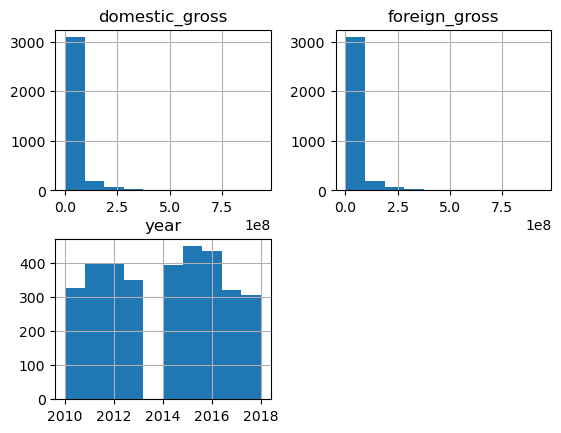

In [31]:
bom_data.hist()

## 4.2 tn_movie_budgets.csv

### 4.2.1 Checking any missing data

In [32]:
print(tn_movie_budgets.isna())
print(tn_movie_budgets.isna().sum())

         id  release_date  movie  production_budget  domestic_gross   
0     False         False  False              False           False  \
1     False         False  False              False           False   
2     False         False  False              False           False   
3     False         False  False              False           False   
4     False         False  False              False           False   
...     ...           ...    ...                ...             ...   
5777  False         False  False              False           False   
5778  False         False  False              False           False   
5779  False         False  False              False           False   
5780  False         False  False              False           False   
5781  False         False  False              False           False   

      worldwide_gross  
0               False  
1               False  
2               False  
3               False  
4               False  
...

In [33]:
# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(tn_movie_budgets)

The Data has no missing values


### 4.2.2 Removing any duplicates

First thing first, we check for any duplicated data in the id section. IDs should be unique to everyone

In [34]:
def identify_duplicates(data):
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1

        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 


identify_duplicates(tn_movie_budgets)

The Data has no duplicates


Now that we have spotted duplicated rows, let's drop them

### 4.2.3 Removing any irrelevant columns

<Axes: xlabel='release_date'>

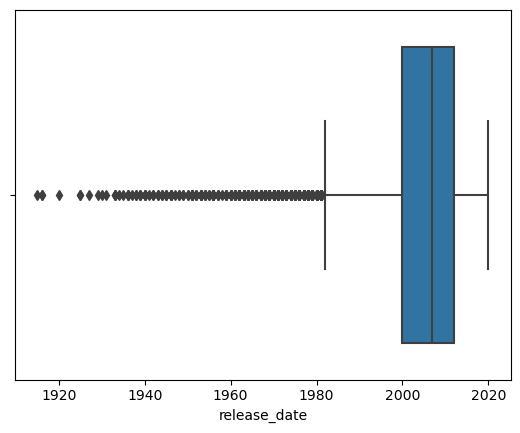

In [35]:
# Checking how the data looks with outliers (in this case movies produced before 2000)
# Convert the release year to pd datetime
tn_movie_budgets["release_date"] = pd.to_datetime(tn_movie_budgets["release_date"])

# Extract the year from the release date
tn_movie_budgets["release_date"] = tn_movie_budgets["release_date"].dt.year

#plot
sns.boxplot(data = tn_movie_budgets, x =  "release_date")

In [36]:
#dropping off
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets["release_date"] > 2010]

In [37]:
# Clean the production_budget column(Remove commas, dollar sign and drop off values which are 0)
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].str.replace("$", "").str.replace(",", "")
tn_movie_budgets["production_budget"] = pd.to_numeric(tn_movie_budgets["production_budget"], errors="coerce")
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets["production_budget"] != 0]

# Clean the domestic_gross column(Remove commas, dollar sign and drop off values which are 0)
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].str.replace("$", "").str.replace(",", "")
tn_movie_budgets["domestic_gross"] = pd.to_numeric(tn_movie_budgets["domestic_gross"], errors="coerce")
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets["domestic_gross"] != 0]

# Clean the worldwide_gross column(Remove commas, dollar sign and drop off values which are 0)
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].str.replace("$", "").str.replace(",", "")
tn_movie_budgets["worldwide_gross"] = pd.to_numeric(tn_movie_budgets["worldwide_gross"], errors="coerce")
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets["worldwide_gross"] != 0]

# Remove rows with NaN or infinite values
tn_movie_budgets = tn_movie_budgets.replace([np.inf, -np.inf], np.nan)
tn_movie_budgets = tn_movie_budgets.dropna(subset=["domestic_gross", "worldwide_gross"])

<Axes: xlabel='release_date'>

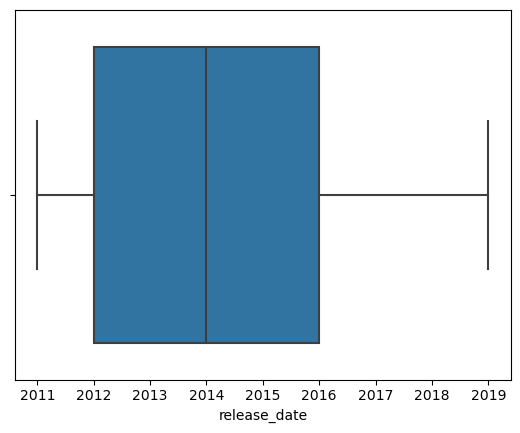

In [38]:
#checking to see how the data now looks like after removing the years prior to 2000
sns.boxplot(data = tn_movie_budgets, x = "release_date")

In [39]:
unique_dates = tn_movie_budgets["release_date"].unique()
print(unique_dates)

[2011 2019 2015 2017 2018 2012 2013 2016 2014]


tn_movie_budgets has no irrelevant data. However

### 4.2.4 Arranging messy data

In [40]:
tn_movie_budgets.columns
[col.strip() for col in tn_movie_budgets.columns]
tn_movie_budgets.columns.str.strip()

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## 4.3 rt.reviews.tsv

### 4.3.1 Checking any missing data

In [41]:
rt_movie_info.isna()
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

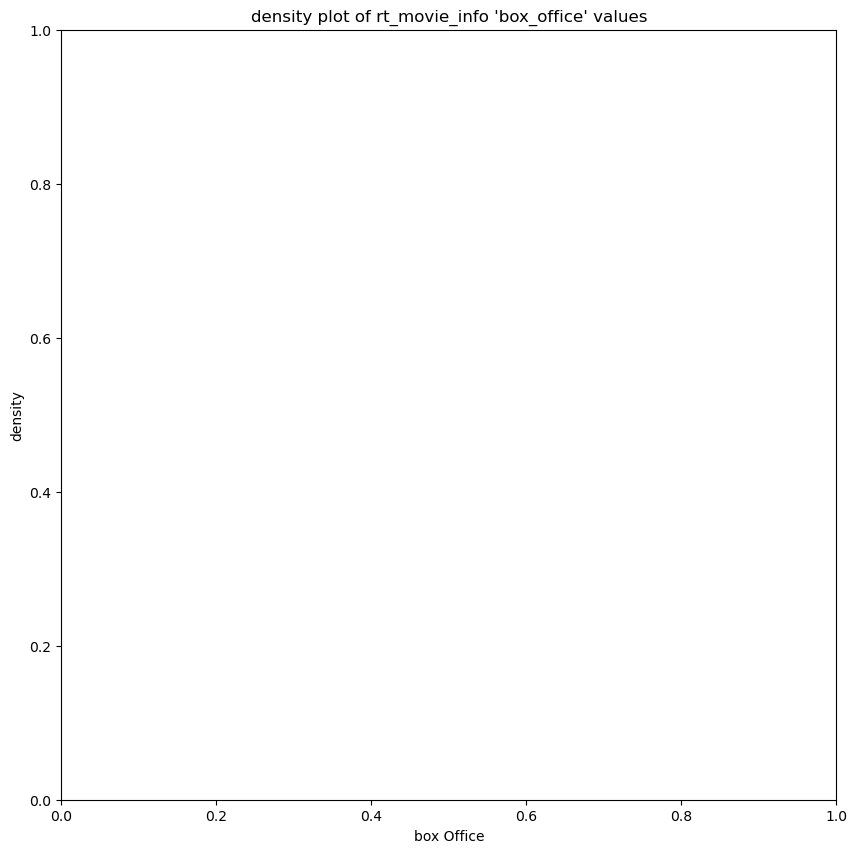

In [42]:
# below is the output of a kernel density plot of box office before cleaning the data
plt.figure(figsize=(10, 10))
sns.kdeplot(pd.to_numeric(rt_movie_info["box_office"], errors='coerce'))
plt.xlabel("box Office")
plt.ylabel("density")
plt.title("density plot of rt_movie_info 'box_office' values")
plt.show()

In [43]:
#replacing missing values in synopsis with unknown
rt_movie_info["synopsis"] = rt_movie_info.synopsis.fillna("unknown")

#replacing missing values in rating with R
# rt_movie_info["rating"] = rt_movie_info.rating.fillna("R")

# replacing missing values in genre with the term Drama
rt_movie_info["genre"] = rt_movie_info.genre.fillna("Drama")

#replacing the missing values in director column with the data in writer column
rt_movie_info["director"] = rt_movie_info["director"].fillna(rt_movie_info["writer"])

#replacing the missing values in writer column with the data in the director column
rt_movie_info["writer"] = rt_movie_info["writer"].fillna(rt_movie_info["director"])

# #replacing missing values in box_office with median
rt_movie_info["box_office"] = rt_movie_info["box_office"].str.replace(",","")
rt_movie_info["box_office"] = rt_movie_info["box_office"].fillna(rt_movie_info["box_office"].median())

# replace missing values in runtime with 120 minutes
rt_movie_info["runtime"] = rt_movie_info.runtime.fillna("120 minutes")

#replace missing values in studio
rt_movie_info["studio"] = rt_movie_info.studio.fillna("Entertainment one")

Let's check if there any more missing values

In [44]:
print(rt_movie_info.isna().sum())

id                 0
synopsis           0
rating             3
genre              0
director         131
writer           131
theater_date     359
dvd_date         359
currency        1220
box_office         0
runtime            0
studio             0
dtype: int64


Since there are missing vlues, we have to continue cleaning

In [45]:
#replacing missing values in director with unknown
rt_movie_info["director"] = rt_movie_info.writer.fillna("unknown")

#replacing missing values in writer with unknown
rt_movie_info["writer"] = rt_movie_info.writer.fillna("unknown")


In [46]:
print(rt_movie_info.isna().sum())

id                 0
synopsis           0
rating             3
genre              0
director           0
writer             0
theater_date     359
dvd_date         359
currency        1220
box_office         0
runtime            0
studio             0
dtype: int64


All good to go! No missing data

### 4.3.2 Removing any duplicates

In [47]:
def identify_duplicates(rt_movie_info):
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in rt_movie_info.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1

        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 


identify_duplicates(rt_movie_info)

The Data has no duplicates


### 4.3.3 Arranging messy columns

In [48]:
rt_movie_info.columns
[col.strip() for col in rt_movie_info.columns]
rt_movie_info.columns.str.strip()

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

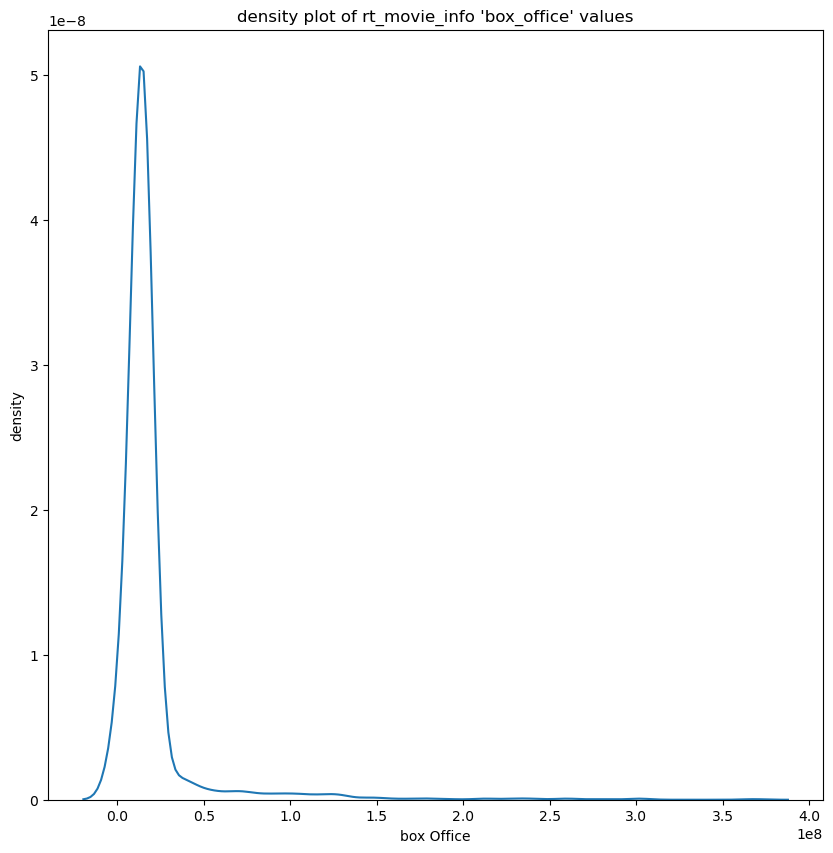

In [49]:
plt.figure(figsize=(10, 10))
sns.kdeplot(pd.to_numeric(rt_movie_info["box_office"], errors='coerce'))
plt.xlabel("box Office")
plt.ylabel("density")
plt.title("density plot of rt_movie_info 'box_office' values")
plt.show()

The bar graphs before and after cleaning are similar because there is very minimal change in rt movie info. No duplicates, no irrelevant data and the missing data was all but filled

### 4.3.4 Dropping off columns

In [50]:
# drop the column dvd_date since it's no longer necessary in today's data
rt_movie_info = rt_movie_info.drop("dvd_date", axis = 1)

# drop the column currency since it's only a dollar sign
rt_movie_info = rt_movie_info.drop("currency", axis = 1)

# drop the column theater date since it's no longer necessary in today's data
rt_movie_info = rt_movie_info.drop("theater_date", axis = 1)

# drop the column theater date since we have directors column. Though not same, they seem to have no big significance diffeence
rt_movie_info = rt_movie_info.drop("writer", axis = 1)

## Final data

Bom_data

In [51]:
bom_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,296000000.0,2010
3,Inception,WB,292600000.0,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,238700000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,4800.0,2018
3384,El Pacto,Sony,2500.0,2500.0,2018
3385,The Swan,Synergetic,2400.0,2400.0,2018


Tn_movie_budgets

In [52]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
...,...,...,...,...,...,...
5719,20,2015,Counting,50000,8374,8374
5731,32,2011,Raymond Did It,40000,3632,3632
5737,38,2016,Krisha,30000,144822,144822
5744,45,2017,Emily,27000,3547,3547


In [53]:
rt_movie_info

,id,synopsis,rating,genre,director,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,Ernest Tidyman,14141054.5,104 minutes,Entertainment one
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg|Don DeLillo,600000,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,14141054.5,116 minutes,Entertainment one
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Paul Attanasio|Michael Crichton,14141054.5,128 minutes,Entertainment one
4,7,unknown,NR,Drama|Romance,Giles Cooper,14141054.5,200 minutes,Entertainment one
...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,unknown,33886034,106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,14141054.5,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,14141054.5,111 minutes,Entertainment one
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans|Robert Gunter,14141054.5,101 minutes,Entertainment one


### 4.4 Combining similar dataframes

Before we dive into data visualizations, lets first merge bom_data and rt_movie_info. They seem to have a lot in common. Like the box office mojo comes as a column in the rotten tomatoes dataframe (literally i.e).
Also, their budgets are so close to one another for both domestic and foreign gross.
To do so, let's use merge, shall we?

In [54]:
# joining bom_data and rt_movie_info
bom_and_rt = bom_data.merge(rt_movie_info, how = "inner")

In [55]:
bom_and_rt.head()

,title,studio,domestic_gross,foreign_gross,year,id,synopsis,rating,genre,director,box_office,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,296000000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes
1,Inception,WB,292600000.0,292600000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes
2,Clash of the Titans (2010),WB,163200000.0,163200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes
3,Due Date,WB,100500000.0,100500000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes
4,Yogi Bear,WB,100200000.0,100200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes


In [56]:
bom_and_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           512 non-null    object 
 1   studio          512 non-null    object 
 2   domestic_gross  512 non-null    float64
 3   foreign_gross   512 non-null    float64
 4   year            512 non-null    int64  
 5   id              512 non-null    int64  
 6   synopsis        512 non-null    object 
 7   rating          512 non-null    object 
 8   genre           512 non-null    object 
 9   director        512 non-null    object 
 10  box_office      512 non-null    object 
 11  runtime         512 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 48.1+ KB


In [57]:
# Checking for any duplicated file
bom_and_rt.duplicated().value_counts()

False    512
Name: count, dtype: int64

In [58]:
# Let's combine the domestic_gross and foreign_gross
bom_and_rt["total_gross"] = bom_and_rt["domestic_gross"] + bom_and_rt["foreign_gross"]
bom_and_rt.head()

,title,studio,domestic_gross,foreign_gross,year,id,synopsis,rating,genre,director,box_office,runtime,total_gross
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,296000000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,592000000.0
1,Inception,WB,292600000.0,292600000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,585200000.0
2,Clash of the Titans (2010),WB,163200000.0,163200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,326400000.0
3,Due Date,WB,100500000.0,100500000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,201000000.0
4,Yogi Bear,WB,100200000.0,100200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,200400000.0


In [59]:
# now let's drop them now that we have the total gross

# First, the domestic gross
bom_and_rt = bom_and_rt.drop("domestic_gross", axis = 1)

#Next, we drop the foreign gross
bom_and_rt = bom_and_rt.drop("foreign_gross", axis = 1)

In [60]:
bom_and_rt.head()

,title,studio,year,id,synopsis,rating,genre,director,box_office,runtime,total_gross
0,Harry Potter and the Deathly Hallows Part 1,WB,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,592000000.0
1,Inception,WB,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,585200000.0
2,Clash of the Titans (2010),WB,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,326400000.0
3,Due Date,WB,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,201000000.0
4,Yogi Bear,WB,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Brian Helgeland,88800000,137 minutes,200400000.0


# 5. Data visualizations

Now, let's visualize the data we just cleaned </br>
First thing first: The head of microsoft needs to understand how the two datasets i.e. bom_and_rt and tn_movie_budgets will be useful in deciding on the movies to focus on when building the movie studio. </br>
That's where the visualizations come in. Data visualized, say by a graph or perhaps a histogram becomes easy to see, and simple to visualize trends over the years than boring long tables

## 5.1 Relationship between Genre and gross income

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Drama|Mystery and Suspense'),
  Text(1, 0, 'Art House and International|Comedy|Drama|Musical and Performing Arts'),
  Text(2, 0, 'Drama|Romance'),
  Text(3, 0, 'Action and Adventure|Drama'),
  Text(4, 0, 'Drama|Horror|Mystery and Suspense'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Action and Adventure|Mystery and Suspense'),
  Text(7, 0, 'Comedy|Drama'),
  Text(8, 0, 'Drama|Horror')])

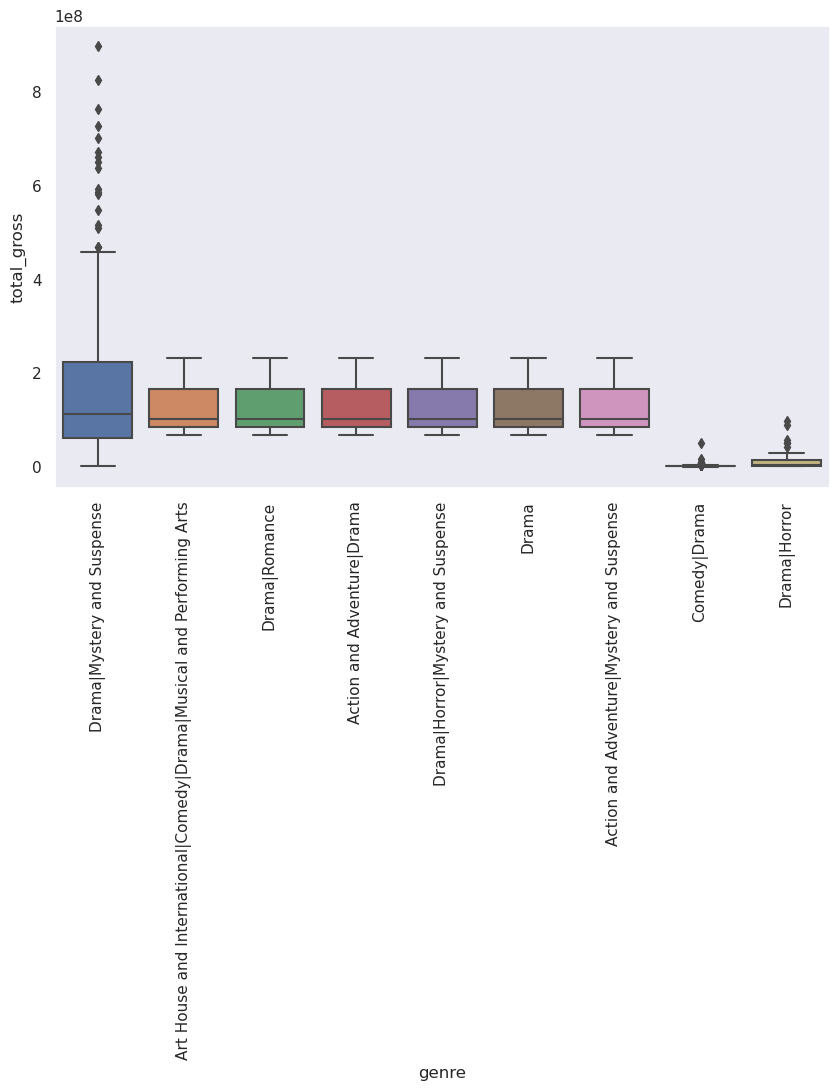

In [61]:
sns.set(style="dark")
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data = bom_and_rt,x = "genre", y = "total_gross")
plt.xticks(rotation = 90)

For the genre, the audience seem to enjoy Drama/Mystery/suspense more than Drama/horror movies. This makes more people watch them more and in return, the total gross of this genre scales upwards. </br>
The rest seem to have quite a fairly equal market share such as Drama/Romance and Drama only. Can't be ignored, though not recommended, perhaps improved is the better word.

## 5.2 Relationship between production budget and worldwide gross 

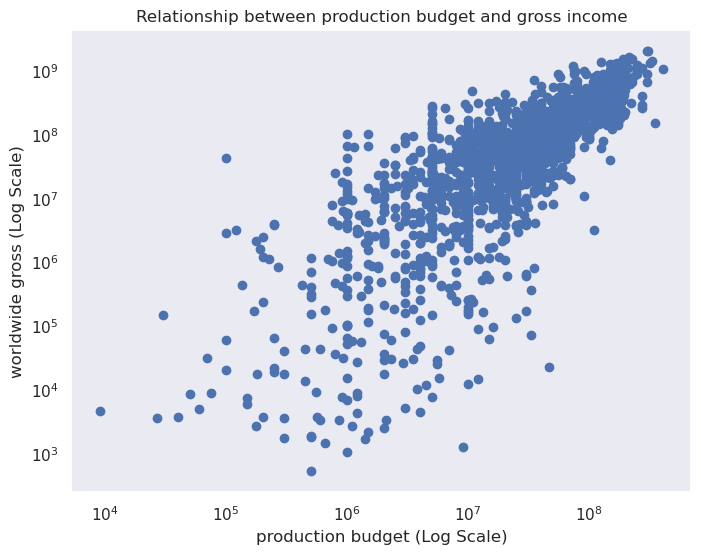

In [62]:
# Let's plot a scatter plot to help us interpret that data
plt.figure(figsize = (8, 6))
plt.scatter(tn_movie_budgets["production_budget"], tn_movie_budgets["worldwide_gross"])
plt.title("Relationship between production budget and gross income")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("production budget (Log Scale)")
plt.ylabel("worldwide gross (Log Scale)")
plt.show()

It's a highly positive linear relation.
When the production budget of a movie increases, so does the world wide gross. </br>
The very high concentration at the very end shows that the movies which have the highest production budget equates to those that equally have the highest gross.

## 5.3 Number of movies per genre

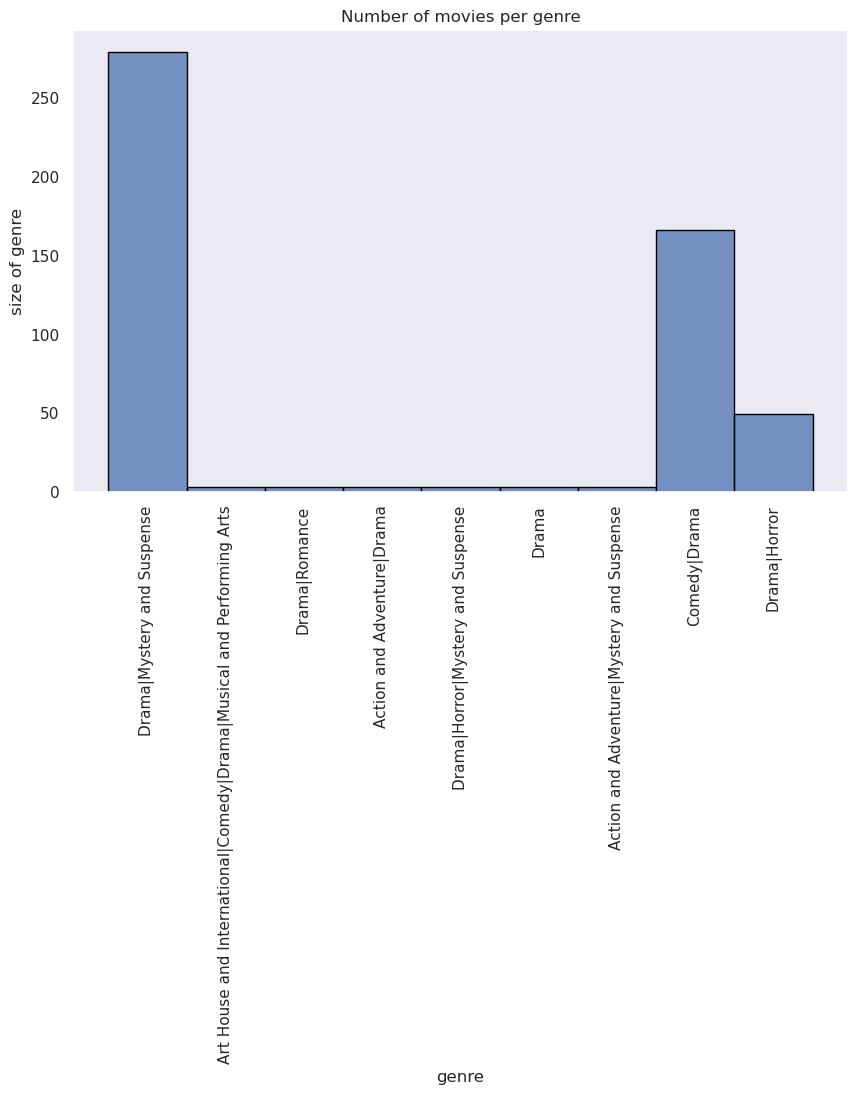

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(bom_and_rt["genre"], bins = 5, edgecolor = "black")
plt.title("Number of movies per genre")
plt.xlabel("genre")
plt.ylabel("size of genre")
plt.xticks(rotation = 90)
plt.show()

Just like in 5.1 which saw type of genre for Drama/Mystery/Suspense having a high gross income, It is no surprise at all to find most movies are based on this genre. </br>
After all, when the demand for a service, in this case the Drama/Mystery and suspense genre goes up, so does the number of movies of such type go up to try and keep up with the demand. </br>
The opposite is also true. Movies such as dramas, dramas/horror are rarely watched as we have seen in 5.1. So production of such genres tends to go down. It wouldnt make sense to produce a movie which is unpopular.

## 5.4 Correlation between domestic and worldwide gross

Correlation: 0.9411929813875589


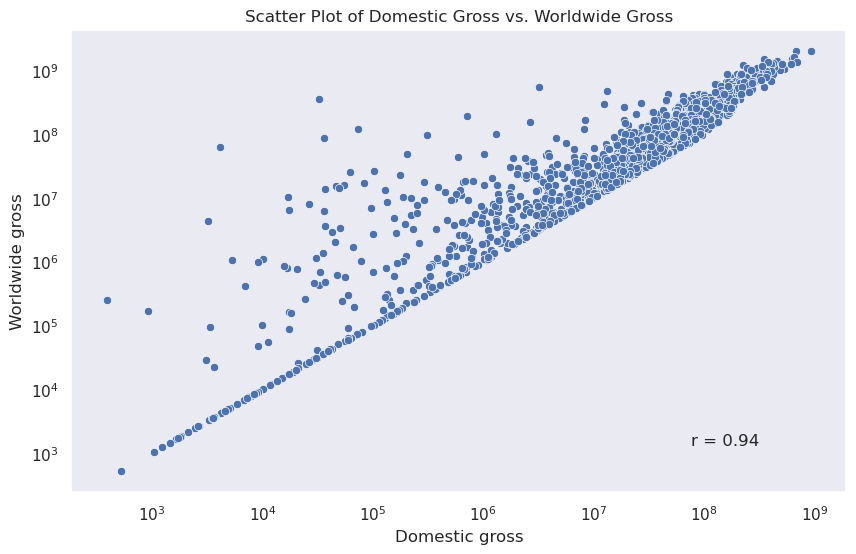

In [64]:
# Calculate the correlation between domestic_gross and worldwide_gross
r, p = stats.pearsonr(tn_movie_budgets["domestic_gross"], tn_movie_budgets["worldwide_gross"])
print("Correlation:", r)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tn_movie_budgets, x="domestic_gross", y="worldwide_gross")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Domestic gross")
plt.ylabel("Worldwide gross")
plt.title("Scatter Plot of Domestic Gross vs. Worldwide Gross")
plt.annotate("r = {:.2f}".format(r), xy=(0.8, 0.1), xycoords="axes fraction")
plt.show()

First, the correlation, 0.944 shows a highly positive linear correlation. </br>
There is a high degree of correlation between domestic gross and worldwide gross </br>
Also, when the domestic gross of a movie increases, so does the worldwide gross. So we can easily say they are directly proportional to each other.</br>
The almost straight line means the pattern between domestic and worldwide gross is easily predictable.

## 5.5 Relationship between Box office and genre

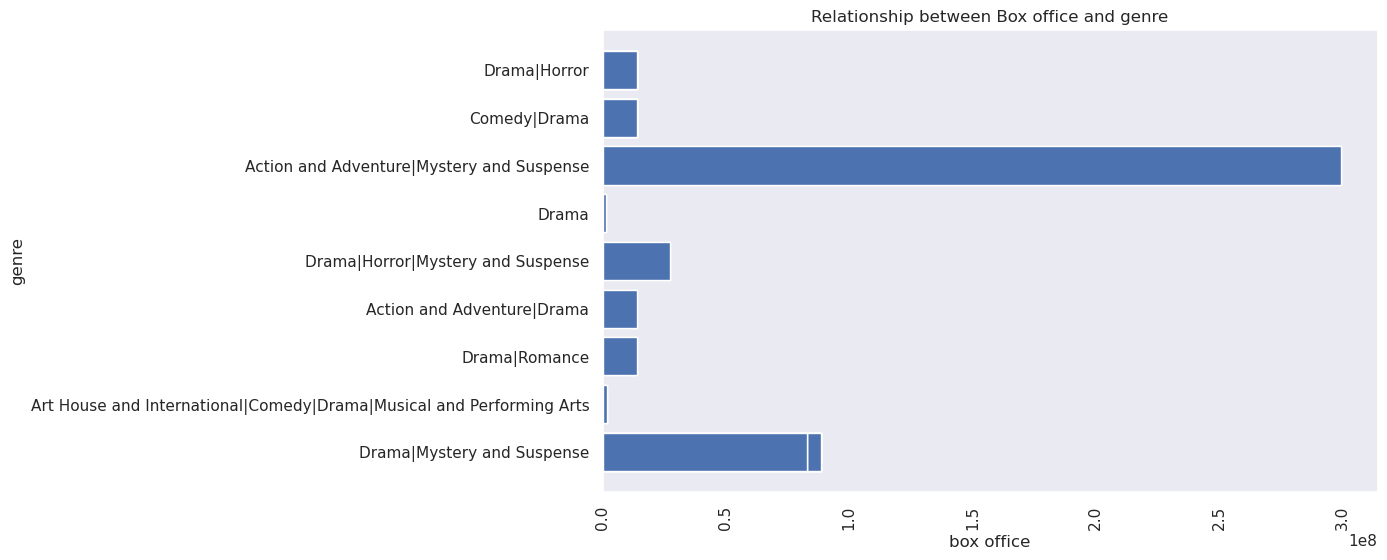

In [65]:
#first we convert the box office dtype into a pand numeric
bom_and_rt["box_office"] = pd.to_numeric(bom_and_rt["box_office"], errors = "coerce")

#Then we plot the figure size
plt.figure(figsize = (10, 6))

#Then we plot the bar graph
plt.barh(bom_and_rt["genre"], bom_and_rt["box_office"])

#THen we label the graph
plt.title("Relationship between Box office and genre")
plt.xlabel("box office")
plt.ylabel("genre")

#Genre is too wordy. We need to rotate it for it not to get too much congested
plt.xticks(rotation = 90)
plt.show()

Unlike the relationship between the income total gross and genre, here things seem to take a different turn. </br>
Action and adventure/Mystery and suspense seem to gain high revenue from tickets a theaters.
This means most people who go to theaters to wtch movies go to watch this type of genre.
But comparing it to the gross income 5.1, Drama/Mystery and suspense movies are mostly watched at theaters, home videos and live streamed.

## 5.6 Distribution of  Rating

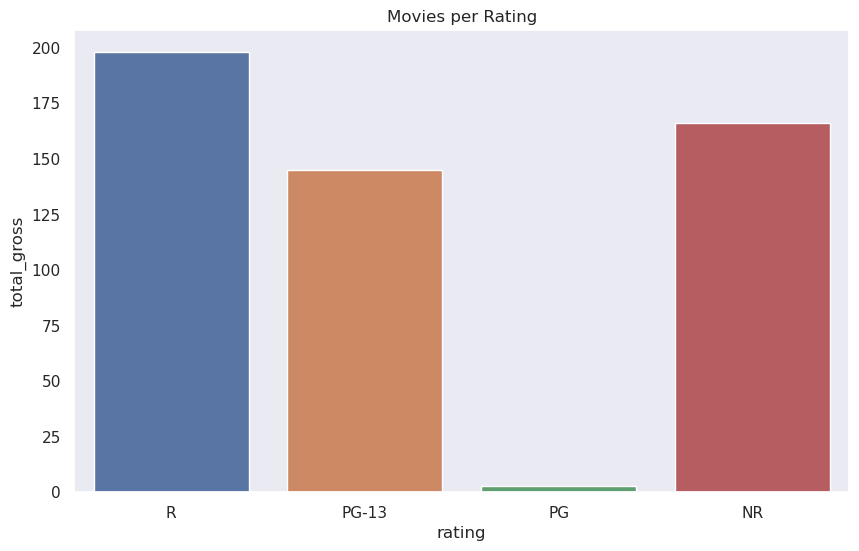

In [66]:
#Plot the figure
fig, ax = plt.subplots(figsize = (10, 6))

#plot the countplot
sns.countplot(data = bom_and_rt, x = "rating")

#plot the labels
ax.set_title("Movies per Rating")
ax.set_xlabel("rating")
ax.set_ylabel("total_gross")

#plot 
plt.show()

R rated movies with an average of 200 million dollars of total gross both domestic and worldwide gross, are easily the head of the table. </br>
The same cannot be said about PG movies which rank the lowest. All ages movies don't earn as much nowadays now that data from 2010 and before was dropped off. </br>
For the PG-13, which of course cautions parents on the age of the child (some content may be in appropriate for children under the age of 13), seem to do quite well as compared to PG movies. </br>
NR or not rated movies are the second highest on the list. It's pretty obvious that's where it ought to be since if it was a R rated type of movie yet it has no "ratings", then people will go for it.

# 6. Conclusions

There is a saying, "Put your money where your mouth is". Most movie productions seem to take up this quote to a high degree only investing on the movies which have the highest number of views. Thats why Drama views barely make it in the least (having a total domestic and worldwide gross of less than 5 million dollars). </br>
Certainly, there seems to have no significance difference from the domestic market to the worldwide market. That shouldn't be a factoe of determining the types of movies to focus on </br>
Also, just because a certain genre has a high box office that doesn't meant will have a high total gross (domestic gross + worldwide gross) e.g., Action and adventure|Mystery and suspense genre has the highest box office while Drama|Mystery and suspense take the second position. But when we compare the two when it comes to the total gross that each has earned, well, now the latter takes the top position while the former takes the fourth position. </br>
The more you invest the more you garner more gross profit. This is evident since most movies which have  high production budgets end up having high gross income.

## 7. Recommendations

1 a). The head of microsoft should consider venturing into Drama|Mystery and suspense since they have the highest gross income. </br>
 b). The head of microsoft should combine that genre with Action and adventure|Mystery and suspense since they have the highest box office. </br>
2. He should consider investing heavily in production to get a high gross profit both domestic and worlwide. </br>
3. Hes hould never consider to produce PG movies since they have the lowest rating and the lowest total gross too.

## 8. References

bom_movie gross file </br>
rt.movie_info file </br>
tn.movie_budgets file